In [1]:
pip install ray

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.2/56.2 MB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 86.7 MB/s eta 0:00:00
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.54.0
    Uninstalling grpcio-1.54.0:
      Successfully uninstalled grpcio-1.54.0


In [2]:
import ray

In [3]:
import time

In [4]:
ray.init()

2023-06-22 12:13:43,348	INFO worker.py:1636 -- Started a local Ray instance.


Python version:,3.10.12
Ray version:,2.5.1


In [ ]:
# ray.shutdown()

In [5]:
@ray.remote
def f(i):
  time.sleep(1)
  return i
futures = [f.remote(i) for i in range (4)]
print(ray.get(futures))

[0, 1, 2, 3]


In [69]:
from google.colab import files
uploaded = files.upload()

Saving doct.csv to doct.csv


In [ ]:
# ray.shutdown()

In [9]:
a=ray.data.read_csv('doct.csv')
type(a)
for batch in a.iter_batches(batch_size=a.count(),batch_format='pandas'):
  data=batch

2023-06-22 12:15:46,575	WARNING dataset.py:253 -- Important: Ray Data requires schemas for all datasets in Ray 2.5. This means that standalone Python objects are no longer supported. In addition, the default batch format is fixed to NumPy. To revert to legacy behavior temporarily, set the environment variable RAY_DATA_STRICT_MODE=0 on all cluster processes.

Learn more here: https://docs.ray.io/en/master/data/faq.html#migrating-to-strict-mode


Read progress 0:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
data.head()

,,text
0,0,__label__2 Stuning even for the non-gamer: Thi...
1,1,__label__2 The best soundtrack ever to anythin...
2,2,__label__2 Amazing!: This soundtrack is my fav...
3,3,__label__2 Excellent Soundtrack: I truly like ...
4,4,"__label__2 Remember, Pull Your Jaw Off The Flo..."


In [11]:
length1=len(data)
data1=[]
data2=[]
data3=[]
data4=[]
data5=[]
data6=[]
data7=[]
data8=[]
data9=[]
for i in range(len(data)):
    if i%9==0:
        data1.append(data['text'][i])
    elif i%9==1:
        data2.append(data['text'][i])
    elif i%9==2:
        data3.append(data['text'][i])
    elif i%9==3:
        data4.append(data['text'][i])
    elif i%9==4:
        data5.append(data['text'][i])
    elif i%9==5:
        data6.append(data['text'][i])
    elif i%9==6:
        data7.append(data['text'][i])
    elif i%9==7:
        data8.append(data['text'][i])
    elif i%9==8:
        data9.append(data['text'][i])

In [6]:
@ray.remote
def f1(data):
  labels1=[]
  for i in range(len(data)):
    str1=""
    for j in range(0,len(data[i])):
      if data[i][j]!=' ':
        str1+=(data[i][j])
      else:
        break
    labels1.append(str1)
  return labels1

In [12]:
d11=f1.remote(data1)
d1=ray.get(d11)
len(d1)

4000

In [13]:
d11=f1.remote(data2)
d2=ray.get(d11)
len(d2)

4000

In [14]:
d11=f1.remote(data3)
d3=ray.get(d11)
len(d3)

4000

In [15]:
d11=f1.remote(data4)
d4=ray.get(d11)
len(d4)

4000

In [16]:
d11=f1.remote(data5)
d5=ray.get(d11)
len(d5)

4000

In [17]:
d11=f1.remote(data6)
d6=ray.get(d11)
len(d6)

4000

In [21]:
d11=f1.remote(data7)
d7=ray.get(d11)
len(d7)

4000

In [19]:
d11=f1.remote(data8)
d8=ray.get(d11)
len(d8)

4000

In [20]:
d11=f1.remote(data9)
d9=ray.get(d11)
len(d9)

4000

In [56]:
for i in range(5):
  print(d9[i])

__label__2
__label__2
__label__1
__label__1
__label__2


In [60]:
# ab=ray.data.read_text('sample.txt')
# for batch in ab.iter_batches(batch_size=18,batch_format='pandas'):
#   data=batch
# print(ab)

2023-06-21 16:43:46,515	INFO streaming_executor.py:91 -- Executing DAG InputDataBuffer[Input] -> TaskPoolMapOperator[ReadText]
2023-06-21 16:43:46,516	INFO streaming_executor.py:92 -- Execution config: ExecutionOptions(resource_limits=ExecutionResources(cpu=None, gpu=None, object_store_memory=None), locality_with_output=False, preserve_order=False, actor_locality_enabled=True, verbose_progress=False)
2023-06-21 16:43:46,520	INFO streaming_executor.py:94 -- Tip: For detailed progress reporting, run `ray.data.DataContext.get_current().execution_options.verbose_progress = True`


Running 0:   0%|          | 0/1 [00:00<?, ?it/s]

2023-06-21 16:43:46,605	INFO streaming_executor.py:149 -- Shutting down <StreamingExecutor(Thread-363, stopped daemon 140006460020480)>.


Dataset(num_blocks=1, num_rows=18, schema={text: string})


In [22]:
a.count()

36000

In [23]:
type(data)

pandas.core.frame.DataFrame

In [24]:
len(data)

36000

In [25]:
type(data)

pandas.core.frame.DataFrame

In [26]:
data.head()

,,text
0,0,__label__2 Stuning even for the non-gamer: Thi...
1,1,__label__2 The best soundtrack ever to anythin...
2,2,__label__2 Amazing!: This soundtrack is my fav...
3,3,__label__2 Excellent Soundtrack: I truly like ...
4,4,"__label__2 Remember, Pull Your Jaw Off The Flo..."


In [7]:
import numpy as np

In [27]:
len(data1)

4000

In [28]:
@ray.remote
def summar(data1):
  summarization1=[]
  for i in range(len(data1)):
    str1=""
    j=len(data1[i])
    for k in range(0,j):
      if data1[i][k]!=':':
        str1+=data1[i][k]
      else:
        break
    summarization1.append(str1)
  return summarization1

In [29]:
s1=summar.remote(data1)
s_real_1=ray.get(s1)
len(s_real_1)

4000

In [30]:
s1=summar.remote(data2)
s_real_2=ray.get(s1)

In [31]:
s1=summar.remote(data3)
s_real_3=ray.get(s1)
len(s_real_3)

4000

In [32]:
s1=summar.remote(data4)
s_real_4=ray.get(s1)
len(s_real_4)

4000

In [33]:
s1=summar.remote(data5)
s_real_5=ray.get(s1)
len(s_real_5)

4000

In [34]:
s1=summar.remote(data6)
s_real_6=ray.get(s1)
len(s_real_6)

4000

In [35]:
s1=summar.remote(data7)
s_real_7=ray.get(s1)
len(s_real_7)

4000

In [36]:
s1=summar.remote(data8)
s_real_8=ray.get(s1)
len(s_real_8)

4000

In [37]:
s1=summar.remote(data9)
s_real_9=ray.get(s1)
len(s_real_9)

4000

In [40]:
@ray.remote
def sum_prof(summarization):
  sum_pro=[]
  for i in range(len(summarization)):
    str1=''
    # print(summarization[i][9],i)
    if summarization[i][9]=='1':
      sum_pro.append(summarization[i].replace('__label__1 ',''))
    else:
      sum_pro.append(summarization[i].replace('__label__2 ',''))
  return sum_pro

In [41]:
s9=sum_prof.remote(s_real_9)
sp9=ray.get(s9)
type(sp9)

list

In [47]:
ray.init()

2023-06-22 12:19:56,926	INFO worker.py:1636 -- Started a local Ray instance.


Python version:,3.10.12
Ray version:,2.5.1


#The time of execution without ray

In [46]:
# start_time=time.time()
# The_data=[]
# for i in range(len(data9)):
#   m=0
#   j=len(data9[i])
#   for k in range(j):
#     if data9[i][k]!=':':
#       m+=1
#     else:
#       break
#   str1=''
#   for x in range(m+2,len(data9[i])):
#     str1+=data9[i][x]
#   The_data.append(str1)
# print(time.time()-start_time)

0.5538430213928223


In [49]:
@ray.remote
def T_data(data):
  start_time=time.time()
  The_data=[]
  for i in range(len(data)):
    m=0
    j=len(data[i])
    for k in range(j):
      if data[i][k]!=':':
        m+=1
      else:
        break
    str1=''
    for x in range(m+2,len(data[i])):
      str1+=data[i][x]
    The_data.append(str1)
  print(time.time()-start_time)
  return The_data

In [50]:
t9=T_data.remote(data9)
th9=ray.get(t9)
len(th9)

4000

In [52]:
import pandas as pd

In [58]:
df = pd.DataFrame(list(zip(d9,sp9,th9)),columns =['labels', 'Description','Text_data'])
df.shape
# df.to_csv("train_colab.csv",index=False)

(4000, 3)

In [59]:
for i in range(len(df)):
  if df['labels'][i]=='__label__1':
    df['labels'][i]='Negative'
  else:
    df['labels'][i]='Positive'

In [60]:
df.head()

,labels,Description,Text_data
0,Positive,A FIVE STAR BOOK,I just finished reading Whisper of the Wicked ...
1,Positive,Fashionable Compression Stockings!,After I had a DVT my doctor required me to wea...
2,Negative,"Works, but not as advertised",I bought one of these chargers..the instructio...
3,Negative,Unfortunately it wasn't entertaining in the le...,"When I first ordered the CD, I figured it was ..."
4,Positive,autumn,"got this for my daughter in NC, she is now mak..."


In [61]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [62]:
import nltk
df['Text_data'] = df['Text_data'].apply(nltk.word_tokenize)
df.head()

,labels,Description,Text_data
0,Positive,A FIVE STAR BOOK,"[I, just, finished, reading, Whisper, of, the,..."
1,Positive,Fashionable Compression Stockings!,"[After, I, had, a, DVT, my, doctor, required, ..."
2,Negative,"Works, but not as advertised","[I, bought, one, of, these, chargers, .., the,..."
3,Negative,Unfortunately it wasn't entertaining in the le...,"[When, I, first, ordered, the, CD, ,, I, figur..."
4,Positive,autumn,"[got, this, for, my, daughter, in, NC, ,, she,..."


In [79]:
@ray.remote
def unique_words():
  new_words=[]
  for i in range(len(df)):
    for j in range(len(df['Text_data'][i])):
      if df['Text_data'][i][j] not in new_words:
        new_words.append(df['Text_data'][i][j])
  return len(new_words)

In [80]:
uw=unique_words.remote()
uw9=ray.get(uw)

In [81]:
print(uw9)

26295


In [78]:
df['Text_data'][0][0]

'I'

In [73]:
@ray.remote
def total_words():
  sum=0
  for i in range(len(df)):
    sum+=df['Text_data'][i]
  return sum

In [74]:
tw=total_words.remote()
tw9=ray.get(uw)
tw9

26295

In [86]:
import string

In [102]:
@ray.remote
def punct_marks():
  for i in range(len(df)):
    for j in range(len(df['Text_data'][i])):
      f=filter(str.isalpha,df['Text_data'][i][j])
      s1="".join(f)
      df['Text_data'][i][j]=s1
  return True

In [103]:
pm9=punct_marks.remote()
pm9f=ray.get(pm9)

In [104]:
@ray.remote
def countempty():
  count=0
  for i in range(len(df)):
    for j in range(len(df['Text_data'][i])):
      if len(df['Text_data'][i][j])==0:
        count+=1
  return count

In [105]:
ce=countempty.remote()
count_empty=ray.get(ce)
count_empty

40860

In [106]:
@ray.remote
def remove_items(test_list, item):

    # using list comprehension to perform the task
    res = [i for i in test_list if i != item]

    return res

In [107]:
for i in range(len(df)):
  ri=remove_items.remote(df['Text_data'][i],'')
  rif=ray.get(ri)
  df['Text_data'][i]=rif

<Axes: xlabel='count', ylabel='labels'>

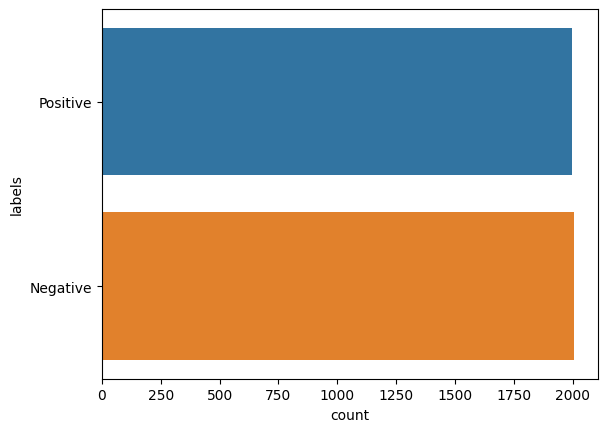

In [108]:
import seaborn as sb
sb.countplot(y=df.labels)

In [109]:
ascii_chars = set(string.printable)

In [112]:
import string
@ray.remote
def remove_non_ascii():
  for i in range(len(df)):
    for j in range(len(df['Text_data'][i])):
      ascii_chars = set(string.printable)
    return ''.join(filter(lambda x: x in ascii_chars, df['Text_data'][i][j]))

In [113]:
rma=remove_non_ascii.remote()
rmaf=ray.get(rma)

In [117]:
for i in range(len(df)):
  for j in range(len(df['Text_data'][i])):
    df['Text_data'][i][j]=df['Text_data'][i][j].lower()

In [118]:
df.head()

,labels,Description,Text_data
0,Positive,A FIVE STAR BOOK,"[i, just, finished, reading, whisper, of, the,..."
1,Positive,Fashionable Compression Stockings!,"[i, just, finished, reading, whisper, of, the,..."
2,Negative,"Works, but not as advertised","[i, bought, one, of, these, chargers, the, ins..."
3,Negative,Unfortunately it wasn't entertaining in the le...,"[when, i, first, ordered, the, cd, i, figured,..."
4,Positive,autumn,"[got, this, for, my, daughter, in, nc, she, is..."


In [119]:
# Download the stopwords from NLTK
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [120]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
for i in range(len(df)):
  k=len(df['Text_data'][i])
  for j in range(k):
    if j<len(df['Text_data'][i]):
      if df['Text_data'][i][j] in stop_words:
        df['Text_data'][i].remove(df['Text_data'][i][j])
df.head()

,labels,Description,Text_data
0,Positive,A FIVE STAR BOOK,"[finished, reading, whisper, wicked, saints, f..."
1,Positive,Fashionable Compression Stockings!,"[finished, reading, whisper, wicked, saints, f..."
2,Negative,"Works, but not as advertised","[bought, one, these, chargers, instructions, s..."
3,Negative,Unfortunately it wasn't entertaining in the le...,"[first, ordered, cd, figured, was, going, be, ..."
4,Positive,autumn,"[got, for, daughter, nc, is, making, prefect, ..."


In [121]:
from string import digits


for i in range(len(df)):
  for j in range(len(df['Text_data'][i])):
    remove_digits = str.maketrans('', '', digits)
    res = df['Text_data'][i][j].translate(remove_digits)
    df['Text_data'][i][j]=res
df.head()

,labels,Description,Text_data
0,Positive,A FIVE STAR BOOK,"[finished, reading, whisper, wicked, saints, f..."
1,Positive,Fashionable Compression Stockings!,"[finished, reading, whisper, wicked, saints, f..."
2,Negative,"Works, but not as advertised","[bought, one, these, chargers, instructions, s..."
3,Negative,Unfortunately it wasn't entertaining in the le...,"[first, ordered, cd, figured, was, going, be, ..."
4,Positive,autumn,"[got, for, daughter, nc, is, making, prefect, ..."
